In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
%matplotlib inline

In [2]:
# load data
with open("/data/dnmpc_eval_results_7.pkl", "rb") as f:
    data = pickle.load(f)
    f.close()
    

In [3]:
# load input
with open("/data/dnmpc_eval_results_7_inputs.pkl", "rb") as in_f:
    in_data = pickle.load(in_f)
    in_f.close()

In [4]:
# input loop
all_ey = []
all_ephi = []
all_cs = []
all_mu = []
for i, combo in enumerate(data):
    # randomized trial loop
    trial_ey = []
    trial_ephi = []
    for trial in combo:
        # trajectory
        trajectory = np.array(trial)
        ey = np.mean(np.abs(trajectory[:, 4]))
        ephi = np.mean(np.abs(trajectory[:, 5]))
        trial_ey.append(ey)
        trial_ephi.append(ephi)
    all_ey.append(trial_ey)
    all_ephi.append(trial_ephi)
    all_cs.append(in_data[i, 0])
    all_mu.append(in_data[i, 1])

In [5]:
ey_df = pd.DataFrame({"mu": all_mu, "cs": all_cs, "ey": all_ey}, columns=["mu", "cs", "ey"]).explode("ey")
ephi_df = pd.DataFrame({"mu": all_mu, "cs": all_cs, "ephi": all_ephi}, columns=["mu", "cs", "ephi"]).explode("ephi")

In [19]:
sns.set_theme(context="talk", style="white", palette="pastel", font="Times New Roman")

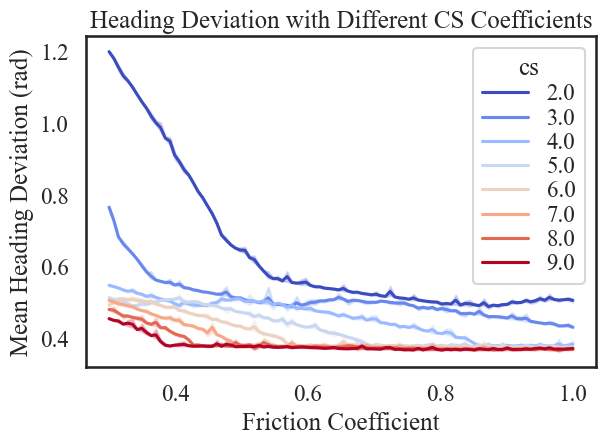

In [23]:
ephi_line = sns.lineplot(data=ephi_df[(ephi_df["cs"] > 1) & (ephi_df["cs"] < 10)], x="mu", y="ephi", hue="cs", legend="full", palette="coolwarm", hue_norm=mpl.colors.Normalize(2.0, 9.0))
ephi_line.set_ylabel("Mean Heading Deviation (rad)")
ephi_line.set_xlabel("Friction Coefficient")
ephi_line.set_title("Heading Deviation with Different CS Coefficients")
sns.move_legend(ephi_line, labelspacing=0.1, loc='best')
plt.tight_layout()
plt.savefig("ephi_vs_cs_mu.pdf", format="pdf", dpi=1200)
# ephi_line.set(yscale="log")

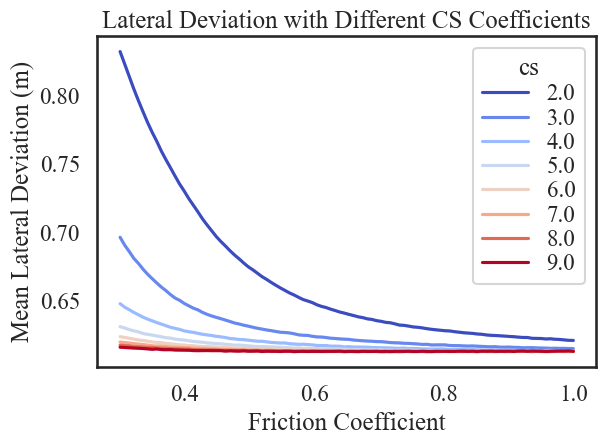

In [26]:
ey_line = sns.lineplot(data=ey_df[(ey_df["cs"] > 1) & (ey_df["cs"] < 10)], x="mu", y="ey", hue="cs", legend="full", palette="coolwarm", hue_norm=mpl.colors.Normalize(2.0, 9.0))
ey_line.set_ylabel("Mean Lateral Deviation (m)")
ey_line.set_xlabel("Friction Coefficient")
ey_line.set_title("Lateral Deviation with Different CS Coefficients")
sns.move_legend(ey_line, labelspacing=0.1, loc='best')
plt.tight_layout()
plt.savefig("ey_vs_cs_mu.pdf", format="pdf", dpi=1200)
# ey_line.set(yscale="log")